(토론-3) 과연 mAP는 신뢰할만한 metric일까?

Object Detection에서는 주로 mAP라는 metric을 활용해서 성능을 평가합니다. (1강 참조)

그렇다면 과연 mAP는 신뢰할만한 metric인지 고민해보면 좋을 것 같아 글을 작성하게 되었습니다.

우선 model의 output을 visualize하였을 때 mAP 점수에 따라서 어떠한 이미지가 나오게 될까요?

1. LB score : 0.5150

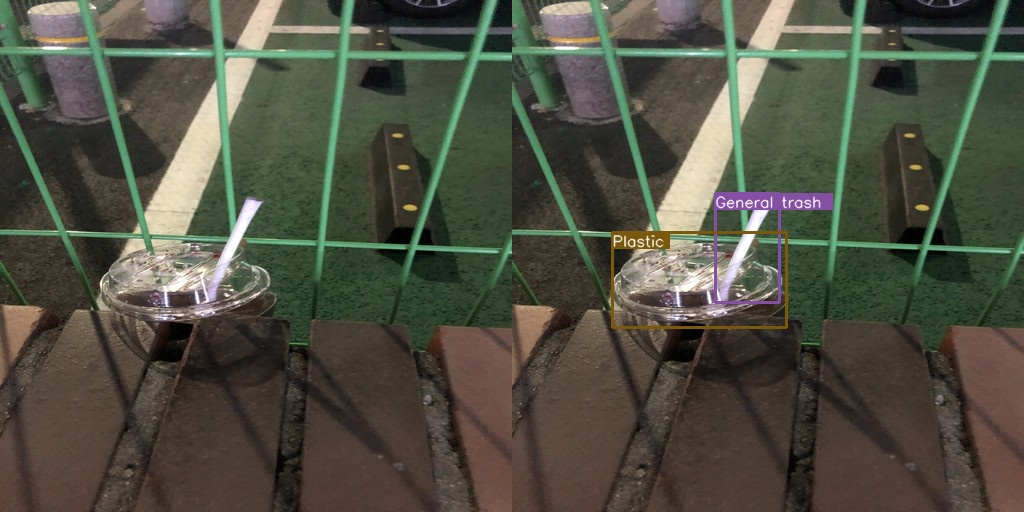
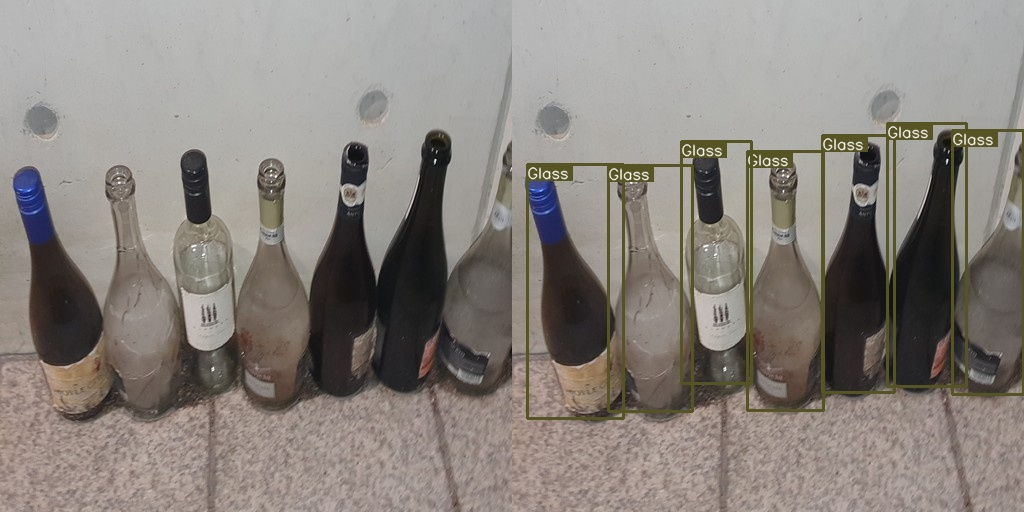
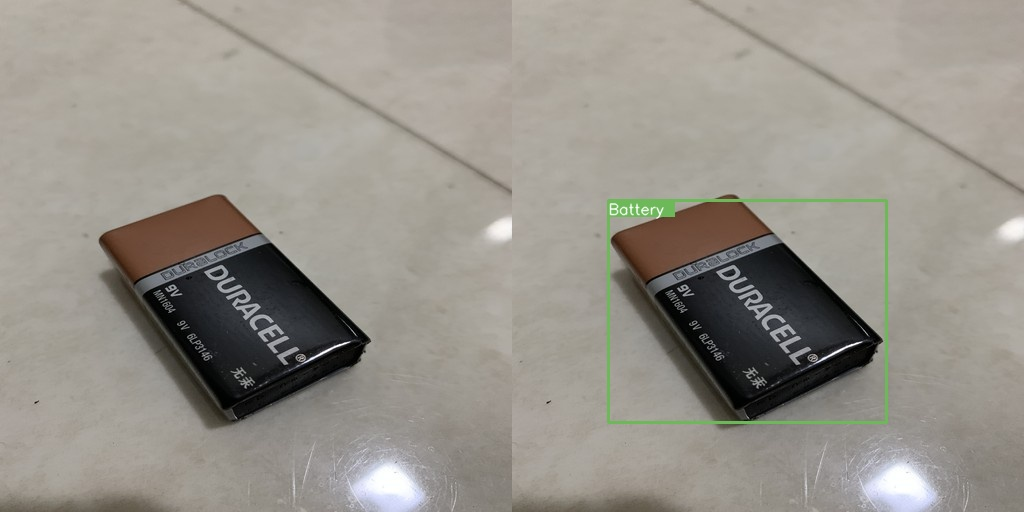
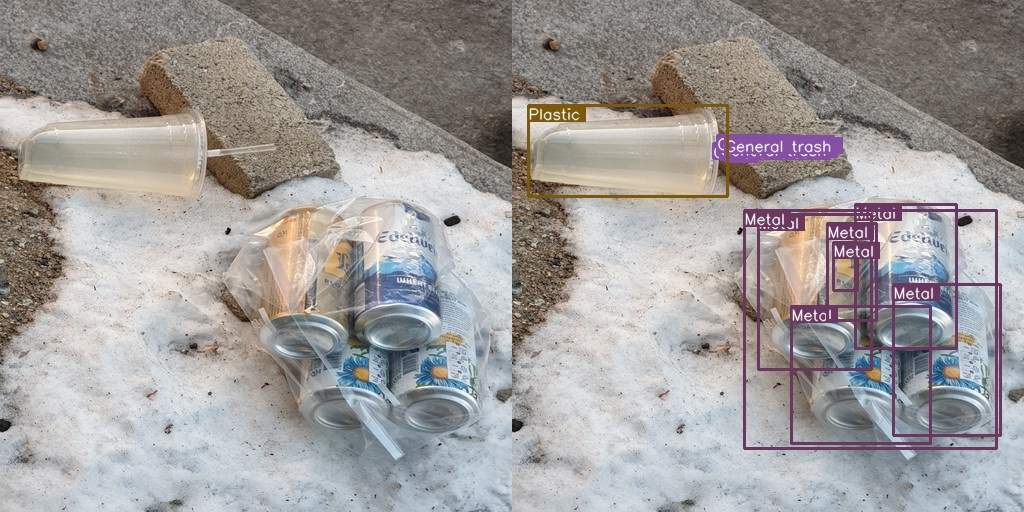
2. LB score : 0.6068

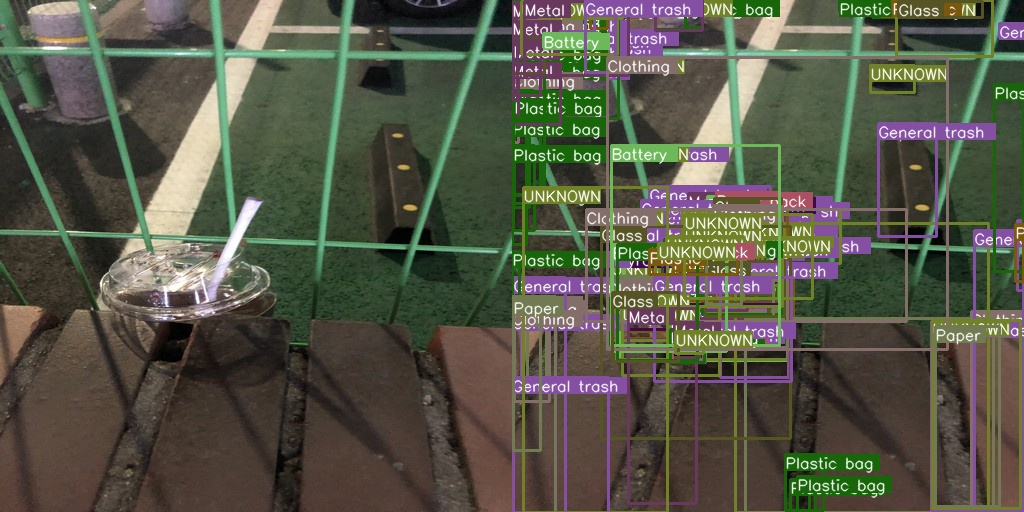
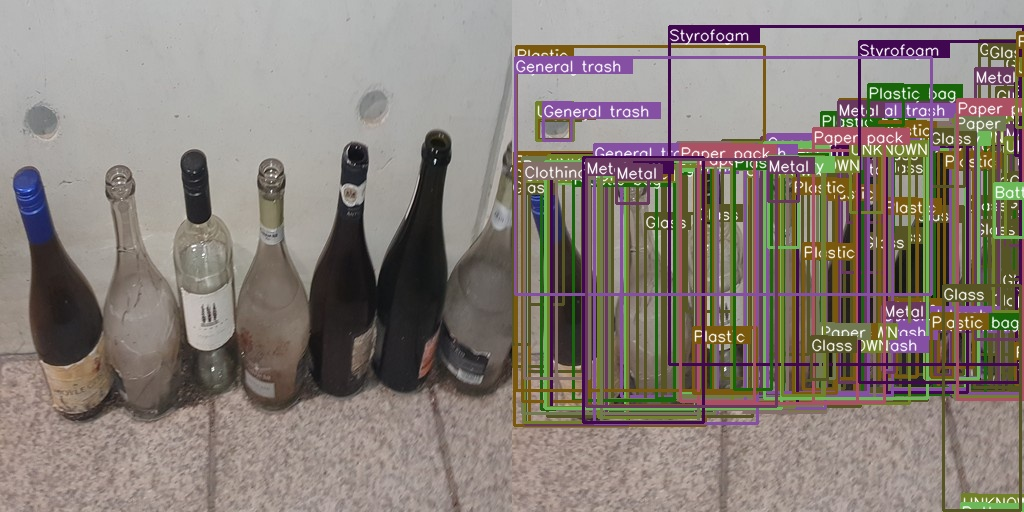
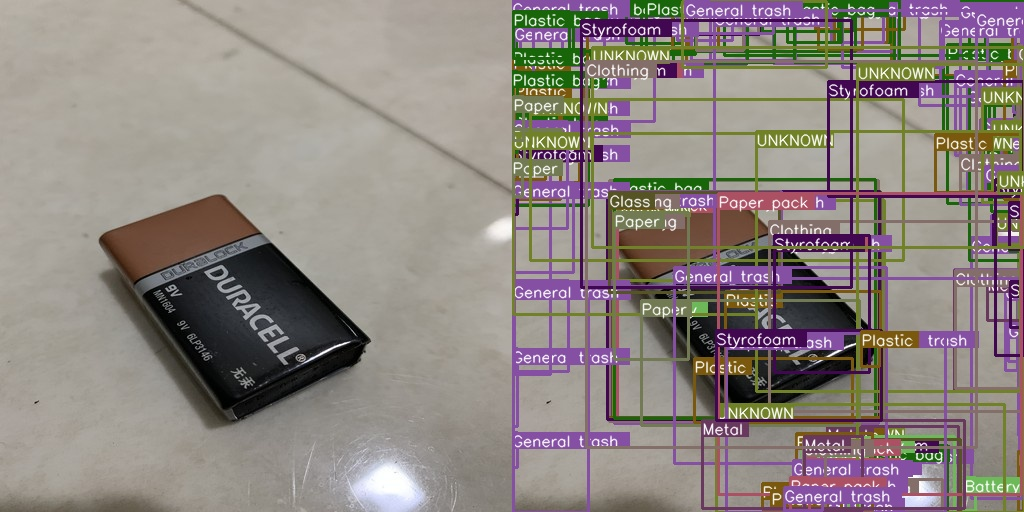
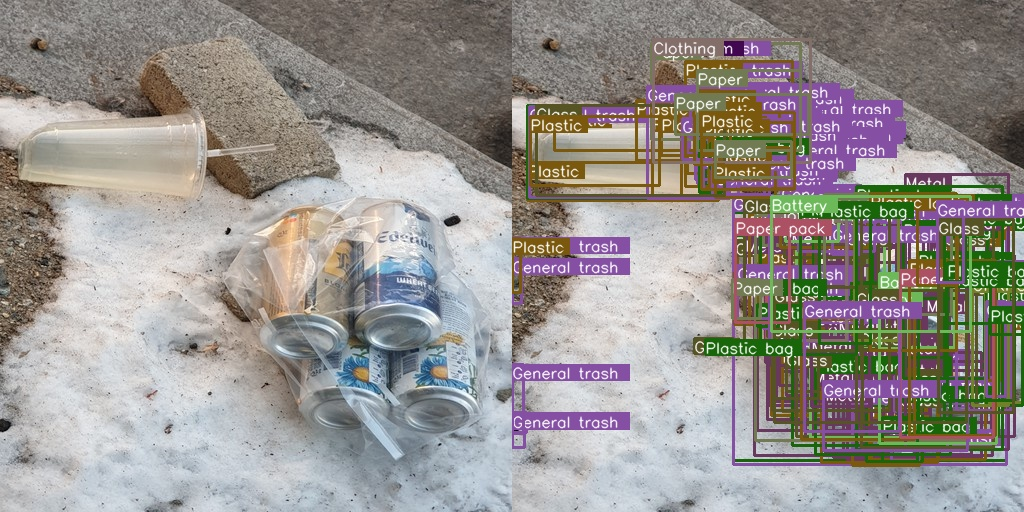

왜 box가 더 많은 model의 output이 mAP성능이 높게 나올까요?

정답은 바로 PR curve에 있습니다.

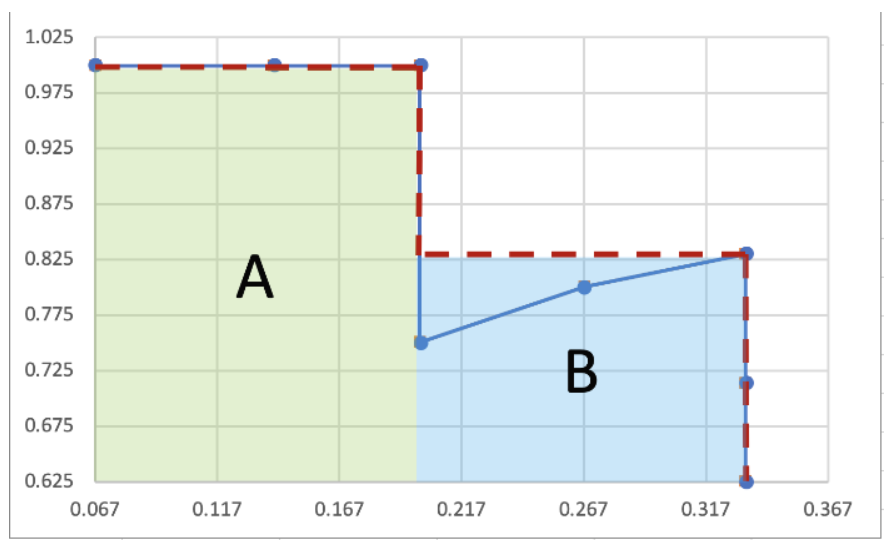

우선 mAP점수 산정방식을 보겠습니다. 위와 같이 PR curve를 구합니다. 이 때 recall과 precision은 confidence score 별로 각 점들이 생성됩니다.

그리고 아래의 넓이 (A+B)에 해당하는 부분이 AP가 됩니다. 이를 각 class 별로 계산하여 mAP를 구하게 됩니다.

다시 사진을 다시 보겠습니다.

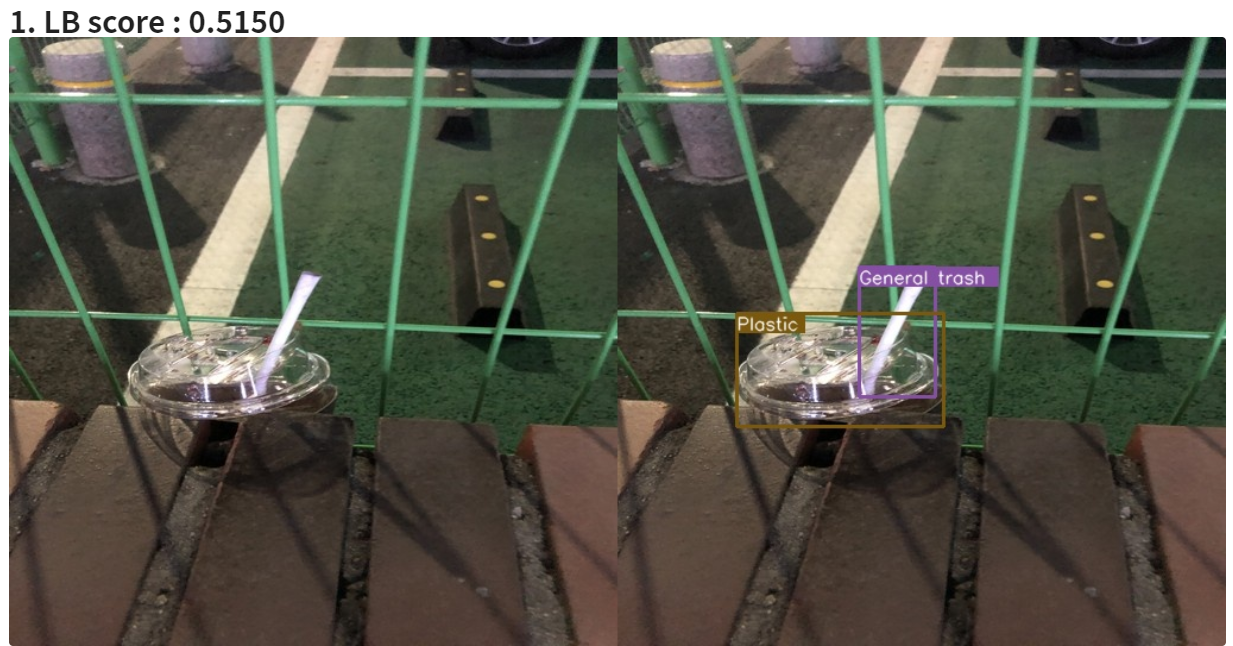
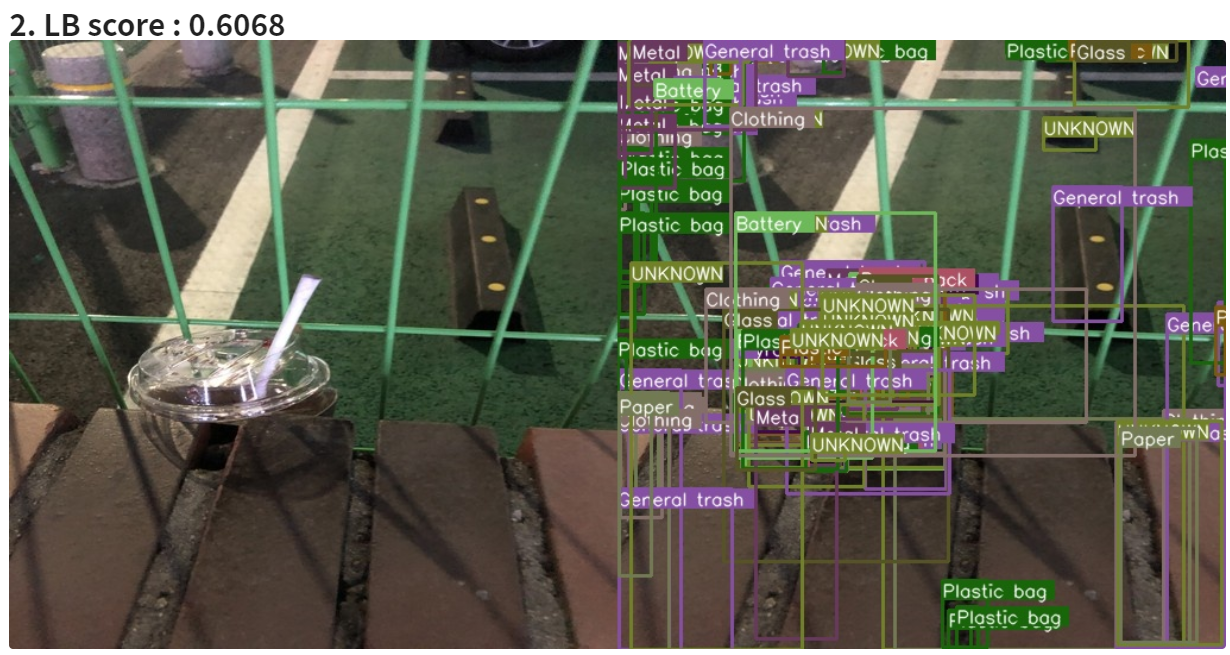
위의 두 사진을 비교하였을 때 확실히 1번 model이 더 잘 detect 된 것으로 보입니다.

그렇다면 2번 model은 물체를 탐지하지 못했을까요? 아닙니다. 수많은 box들 중 정답 box도 존재할 것 입니다. 그렇다면 저 많은 box들이 mAP를 올리는데 기여한 것 입니다.

그렇다면 왜 mAP가 오를까요? PR curve의 recall과 precision은 긍정 데이터에 대한 예측률입니다. 그래프를 보시면 낮은 threshold에서 precision이 떨어지더라도 recall이 조금이라도 오른다면 graph의 면적을 넓어지게 됩니다. 즉 mAP가 오르는 것입니다. 아래의 box친 부분이 넓어진 면적으로 어림짐작 할 수 있습니다.

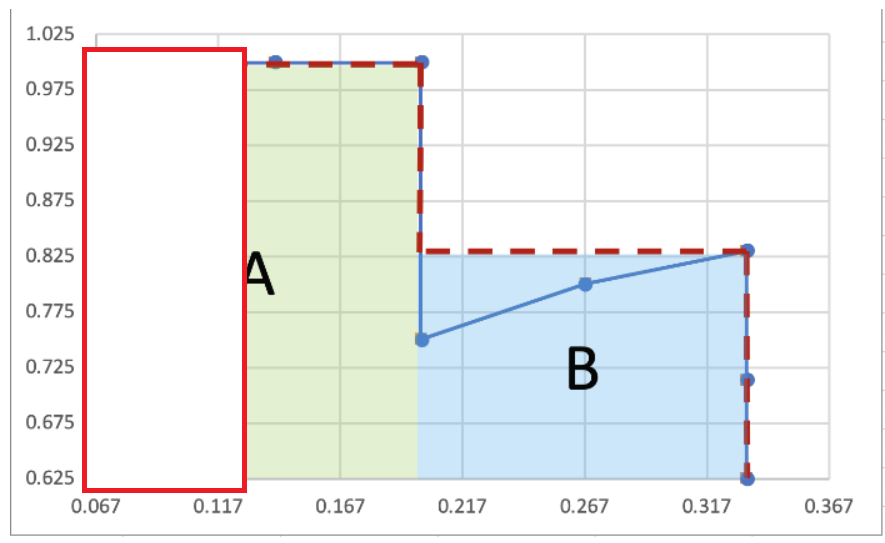

그렇다면 무작정 box를 많이 생성하면 안되나요? 그렇게 되면 높은 threshold 에서의 precision도 떨어져 mAP성능 또한 떨어지게 됩니다. 그렇기 때문에 낮은 threshold의 box가 object 근처에 있을 법한 box가 생성되는 것이 중요합니다.

그렇다면 실제 서비스화를 할 때 어떻게 하나요? 실제 서비스화 할 때는 threshold를 적절히 설정하여 서빙하게 됩니다. 또한 위의 사진처럼 visualize하지 않고 confidence score 별로 box 색을 진하게 생성하게 된다면 threshold 별로 output이 어떻게 나오는지 알 수 있습니다.

위와 같은 이유로 mAP의 성능이 결정이 되며, 주로 mAP가 낮은 model의 경우 object를 탐지하더라도 낮은 score를 가지고 있으며 어려운 물체는 탐지조차 못합니다. mAP가 높은 model의 경우 object를 탐지할 때 높은 score를 가지고 있으며 어려운 물체를 낮은 score에서라도 탐지하는 것으로 보입니다.

이렇듯 mAP와 실제 output에 대해 알아보았는데 여러분들의 의견은 어떤지 남겨주세요 🙂

관련 metric에 관한 글도 공유드립니다.

(링크) VinBigData Chest X-ray Abnormalities Detection